# Building Taxi Fare Prediction using SageMaker 

<p>This demo notebook guides through the steps in creating an AWS Sagemaker predictions service</p>
<p>To start using Sagemaker go here: <a href="https://aws.amazon.com/sagemaker/">Sagemaker</a></p>

## Read the whole data from S3

In [1]:
import pandas as pd
import os
from s3fs.core import S3FileSystem
import random

import boto3
import json

In [2]:
s3 = S3FileSystem(anon=False)
bucket = 'aws-worskhop-data'
file_list = s3.ls(bucket)
subs = 'ZIPCHUNKS'
res = [i for i in file_list if subs in i] 

In [3]:
res

['aws-worskhop-data/ZIPCHUNKSaa',
 'aws-worskhop-data/ZIPCHUNKSab',
 'aws-worskhop-data/ZIPCHUNKSac',
 'aws-worskhop-data/ZIPCHUNKSad',
 'aws-worskhop-data/ZIPCHUNKSae',
 'aws-worskhop-data/ZIPCHUNKSaf']

In [4]:
string = 'aws-worskhop-data/QSS'
string2 = 'aws-worskhop-data/QSS2'

In [5]:
with s3.open(string2, 'wb') as f:
    f.write(s3.cat(string)+s3.cat(string))

In [6]:
with s3.open('aws-worskhop-data/taxinyc_train.csv.zip', 'wb') as f:
    f.write(s3.cat(res[0]) + s3.cat(res[1]) + s3.cat(res[2]) + s3.cat(res[3]) + s3.cat(res[4]) + s3.cat(res[5]))

In [7]:
bucket = 'aws-worskhop-data'
path = ''

filename = 'taxinyc_train.csv.zip'
s3_path = os.path.join('s3://', bucket, path, filename)

#df_all = pd.read_csv(s3_path)

df_all = pd.read_csv(s3_path, header=0, skiprows=lambda i: i>0 and random.random() > 0.01)

In [8]:
df_all

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2013-09-21 02:54:00.000000103,7.5,2013-09-21 02:54:00 UTC,-73.991995,40.744990,-73.986237,40.729637,2
1,2014-07-23 08:42:00.000000175,10.0,2014-07-23 08:42:00 UTC,-73.992760,40.751162,-73.980980,40.752827,1
2,2011-03-20 17:25:00.000000108,6.9,2011-03-20 17:25:00 UTC,-73.979605,40.752025,-73.993742,40.756685,1
3,2011-12-03 20:56:00.000000132,10.5,2011-12-03 20:56:00 UTC,-74.001972,40.734998,-73.981498,40.743742,1
4,2014-08-19 16:52:48.0000001,5.0,2014-08-19 16:52:48 UTC,-73.995087,40.760146,-73.982215,40.763185,1
5,2009-03-30 10:56:00.00000086,4.1,2009-03-30 10:56:00 UTC,-73.990930,40.765603,-73.982563,40.770270,1
6,2011-12-01 15:38:24.0000001,12.1,2011-12-01 15:38:24 UTC,-73.959546,40.767462,-73.993107,40.757670,2
7,2013-03-23 12:37:00.000000107,5.0,2013-03-23 12:37:00 UTC,-74.000407,40.714337,-74.000503,40.718452,1
8,2014-06-20 01:02:07.0000004,7.0,2014-06-20 01:02:07 UTC,-73.995163,40.744714,-73.999739,40.728509,1
9,2011-10-26 23:00:42.0000006,7.7,2011-10-26 23:00:42 UTC,-73.981439,40.760569,-73.957854,40.779309,1


## Start Exploring the data 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [10]:
# Sample the data - because it only take a 100K records to feel the data
df_all = df_all.sample(int(1e5))

In [11]:
df_small = df_all.sample(int(1e2))
df_small

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
316814,2012-10-14 03:40:44.0000001,17.50,2012-10-14 03:40:44 UTC,-73.985410,40.744433,-73.966285,40.808254,1
368479,2013-03-13 07:40:00.000000141,7.00,2013-03-13 07:40:00 UTC,-73.958032,40.783160,-73.939513,40.805240,5
240424,2011-07-17 04:17:04.0000002,9.30,2011-07-17 04:17:04 UTC,-74.005136,40.719088,-73.990975,40.758546,1
140372,2014-01-02 18:58:00.0000007,7.50,2014-01-02 18:58:00 UTC,-73.978240,40.757397,-73.989902,40.764887,4
411681,2010-05-02 03:19:00.0000005,6.10,2010-05-02 03:19:00 UTC,-73.999437,40.733605,-73.979703,40.743188,2
378336,2012-04-11 14:45:00.000000123,5.70,2012-04-11 14:45:00 UTC,-73.983600,40.760397,-73.993725,40.758852,1
30196,2010-03-19 09:10:00.000000137,37.30,2010-03-19 09:10:00 UTC,-74.009658,40.706293,-73.848283,40.856512,1
57298,2011-01-05 15:06:00.00000054,6.10,2011-01-05 15:06:00 UTC,-73.976540,40.743617,-73.993478,40.735992,5
386962,2010-07-29 18:02:47.0000003,8.90,2010-07-29 18:02:47 UTC,-74.012325,40.701465,-73.983567,40.721500,1
550608,2014-10-26 20:47:00.0000002,7.50,2014-10-26 20:47:00 UTC,-73.993642,40.747090,-73.988093,40.759155,1


In [12]:
df_all.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,99997.000000,99997.000000,100000.000000
mean,11.288433,-72.469016,39.868425,-72.460816,39.902217,1.690010
std,9.631069,11.037170,10.344460,10.838849,6.900099,1.308523
min,-10.500000,-736.350000,-2478.886388,-735.100000,-74.026230,0.000000
25%,6.000000,-73.992070,40.734920,-73.991425,40.734117,1.000000
50%,8.500000,-73.981877,40.752697,-73.980256,40.753203,1.000000
75%,12.500000,-73.967224,40.767133,-73.963797,40.767962,2.000000
max,232.580000,40.795555,649.977717,40.895392,649.977717,6.000000


### Date-Time Features 

In [13]:
df_all['ts'] = df_all['pickup_datetime'].apply(pd.Timestamp)

In [14]:
df_all['weekday'] = df_all['ts'].dt.weekday
df_all['day'] = df_all['ts'].dt.day
df_all['month'] = df_all['ts'].dt.month
df_all['year'] = df_all['ts'].dt.year
df_all['hour'] = df_all['ts'].dt.hour

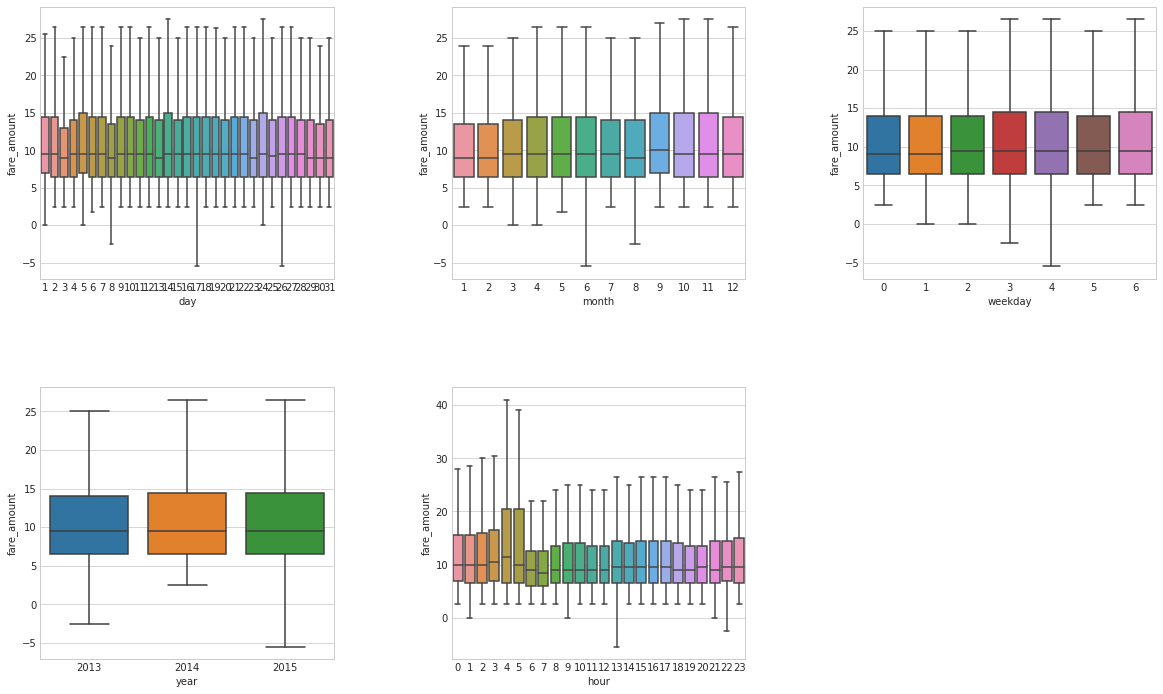

In [15]:
time_features = ['day', 'month', 'weekday', 'year', 'hour']

fig = plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(time_features)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.boxplot(x=time_features[i], y="fare_amount", data=df_all[df_all['year'] >= 2013], showfliers=False)

plt.show()

### Geographic 

https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration

In [16]:
nyc_box = (-74.1, -73.7, 40.6, 40.9)

In [17]:
def filter_coordinates(df, box):
    return (df.pickup_longitude >= box[0]) & (df.pickup_longitude <= box[1]) & \
           (df.pickup_latitude >= box[2]) & (df.pickup_latitude <=box[3]) & \
           (df.dropoff_longitude >= box[0]) & (df.dropoff_longitude <= box[1]) & \
           (df.dropoff_latitude >= box[2]) & (df.dropoff_latitude <= box[3])

In [18]:
def plot_hires(df, box, figsize=(12, 12), ax=None, c=sns.color_palette("husl", 2)):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = filter_coordinates(df, box)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.1, lw=0.1, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.1, lw=0.1, alpha=0.5)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


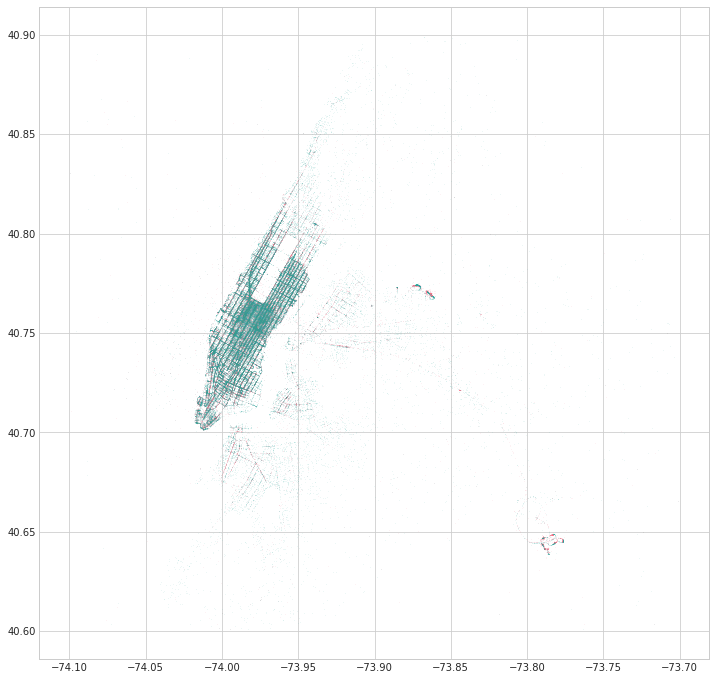

In [19]:
plot_hires(df_all, nyc_box)

<p>In the scatter plot above, the two major NYC airports are easily observed, indicating that it may be informative to "tell" our algorithm whether the ride starts or ends in an airport.</p>
<p>To do so I use the airports.csv, available <a href="http://ourairports.com/data/">here</a> in the following way:</p>
<ul>
<li>from this file I extract the location of 3 of the listed NYC airports</li>
<li>I than calculate the distance of dropoff and pickup points from every record to each airport, Assuming it will provide additional information to our model.</li>
</ul>
<p>Further details are in the feature extraction below</p>

## Ride distance 

In [20]:
df_all['air_distance'] = (df_all.pickup_longitude - df_all.dropoff_longitude)**2 +\
                     (df_all.pickup_latitude - df_all.dropoff_latitude)**2
df_all['air_distance'] = np.sqrt(df_all['air_distance'])

In [21]:
df_all['price_per_distance'] = df_all['fare_amount'] / df_all['air_distance']

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


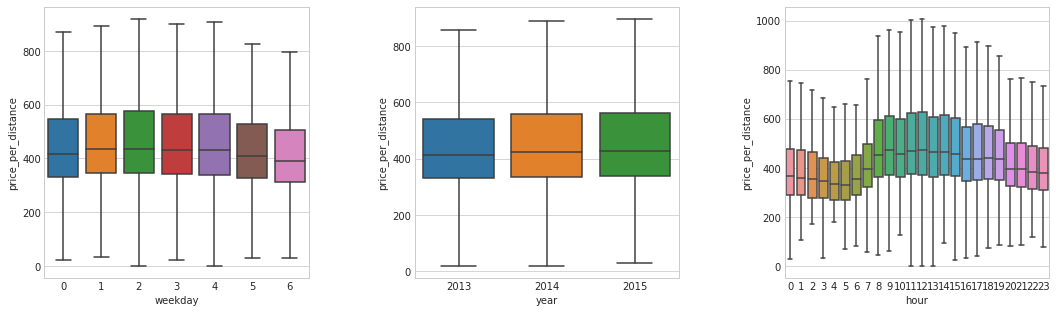

In [22]:
time_features = ['weekday', 'year', 'hour']
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(time_features)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.boxplot(x=time_features[i], y="price_per_distance", data=df_all[df_all['year'] >= 2013], showfliers=False)

plt.show()

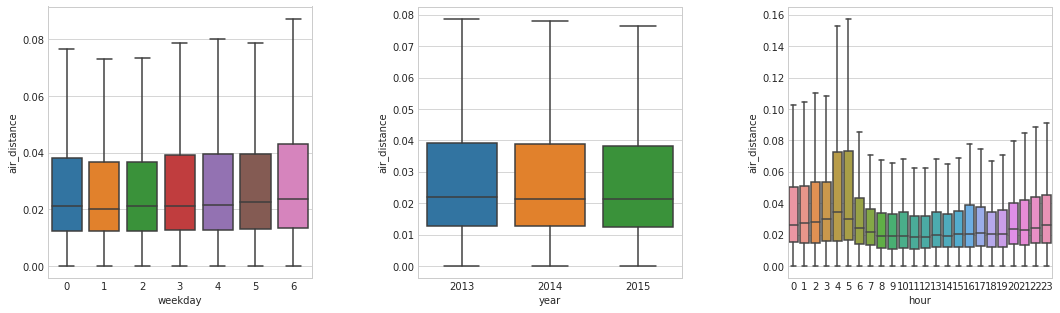

In [23]:
time_features = ['weekday', 'year', 'hour']
fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(len(time_features)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.boxplot(x=time_features[i], y="air_distance", data=df_all[df_all['year'] >= 2013], showfliers=False)

plt.show()

## Use Athena to extract features on all data

<p>As mentioned, the dataset we are working with contains 55M records, making its handling too heavy for a single machine.</p>
<p>Using a distributed computing engine like&nbsp;<a href="https://aws.amazon.com/athena/">AWS Athena</a>&nbsp;will enable you to extract features and save data efficiently.&nbsp;</p>
<p>In order to work on the data, we upload it to S3, and than partition it using AWS Glue. Partitioning is critical to make Athena run efficiently. For examples on how to use Glue, go&nbsp;<a href="https://github.com/doitintl/aws-glue-workshop">HERE</a>.</p>

### Extract features 

<p>With the data partitioned (say, by year and month), run the following Athena query to extract the following features&nbsp;</p>
<p>After extracting features, partition the query results using Glue (again)</p>

CREATE DATABASE IF NOT EXISTS taxinyc;

CREATE EXTERNAL TABLE IF NOT EXISTS taxinyc.raw_data (
               key VARCHAR(255),
               fare_amount FLOAT,
               pickup_datetime VARCHAR(255),
               pickup_longitude FLOAT,
               pickup_latitude FLOAT,
               dropoff_longitude FLOAT,
               dropoff_latitude FLOAT,
               passenger_count INT
               )
               ROW FORMAT DELIMITED
               FIELDS TERMINATED BY ","
               LINES TERMINATED BY "\n"
               LOCATION 's3://aws-worskhop-data/taxi-nyc'
               TBLPROPERTIES (
               'skip.header.line.count' = '1'
               );

SELECT * FROM "taxinyc"."raw_data" limit 10;

In [24]:
SQL = '''
WITH 
    dataset AS 
    (SELECT CAST (pickup_datetime AS TIMESTAMP WITH time zone) AT TIME ZONE 'America/New_York' AS est, 
                  ST_POINT(pickup_longitude,pickup_latitude) pickup_point,
                  ST_POINT(dropoff_longitude,dropoff_latitude) dropoff_point,
                  to_unixtime( CAST (pickup_datetime AS TIMESTAMP WITH time zone) AT TIME ZONE 'America/New_York') AS                     epoch,
                  24*60*60 as seconds_in_day,
                  *
      FROM train_v3),
    
    airports AS (SELECT 
                  kv['LaGuardia'] AS LaGuardia,
                  kv['Downtown Manhattan/Wall St. Heliport'] AS Manhattan,
                  kv['John F Kennedy Intl'] AS JFK
    FROM (SELECT map_agg(name, point_location) kv
        FROM 
            (SELECT name,
         ST_POINT(longitude,
         latitude) point_location
            FROM usa_airports
            WHERE city = 'New York' )
            ))
        SELECT 
        
        -- Target
         fare_amount,
         
         -- time features
         day(est) day,
         day_of_week(est) dayofweek ,
         year(est) year ,
         month(est) month ,
         day_of_month(est) dayofmonth ,
         hour(est) hour ,
         minute(est) minute ,
         
         -- cyclclical variables
         sin(2*pi()*epoch/seconds_in_day) sin_day,
         cos(2*pi()*epoch/seconds_in_day) cos_day,
         sin(2*pi()*epoch/(seconds_in_day*7)) sin_week,
         cos(2*pi()*epoch/(seconds_in_day*7)) cos_week,
         
         
         -- Distance features
         pickup_longitude - dropoff_longitude diff_longitude,
         pickup_latitude - dropoff_latitude diff_latitude,
         ST_Distance(pickup_point, dropoff_point) dist,
         
         -- Airports features
         ST_DISTANCE(airports.LaGuardia, dropoff_point) dropoff_laguardia,
         ST_DISTANCE(airports.LaGuardia, pickup_point ) pickup_laguardia,
         ST_DISTANCE(airports.JFK, dropoff_point) dropoff_JFK,
         ST_DISTANCE(airports.JFK, pickup_point) pickup_JFK,
         ST_DISTANCE(airports.Manhattan, dropoff_point) dropoff_manhattan,
         ST_DISTANCE(airports.Manhattan, pickup_point) pickup_manhattan,
         
         -- Raw features
         pickup_longitude,
         pickup_latitude,
         dropoff_longitude,
         dropoff_latitude,
         passenger_count
         
    FROM dataset, airports
'''

## Split train test 

<p>If you managed to create the dataset using Athena, you have two options on how to create train and validation sets files.&nbsp;</p>
<ol>
<li>Create a seperate query, using a WHERE on the year clause to split the train and validation by time (e.g. year, month)</li>
<li>Create a single query, partition the results by time, and use aws-cli to mv the directories to different train/validation directotires</li>
</ol>

## Train model 

In [25]:
from sagemaker.amazon.amazon_estimator import get_image_uri
import sagemaker
from sagemaker import get_execution_role
import boto3
from datetime import datetime
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
bucket = 'aws-worskhop-data'

path_train = 'taxinyc-query-results/train/78a6a6df-267a-4783-bef4-fd6eb4f082fa.csv'
path_validate = 'taxinyc-query-results/validate/60c4073e-00bc-4e80-a9aa-d93e53687a28.csv' 

s3_path_2014 = os.path.join('s3://', bucket, path_train)
s3_path_2015 = os.path.join('s3://', bucket, path_validate)

In [27]:
df_2014 = pd.read_csv(s3_path_2014, header=0, skiprows=lambda i: i>0 and random.random() > 0.1)

#n = 10  # every 100th line = 1% of the lines
#df_2014 = pd.read_csv(s3_path_2014, header=0, skiprows=lambda i: i % n != 0)

df_2014
df_2014.to_csv('train_small_2014.csv', header=False, index=False)
df_2014_final = pd.read_csv('./train_small_2014.csv')
df_2014_final

,4.5,4,6,2014,10,4.1,11,8,-0.7327408814698715,-0.6805077520666136,0.7033651646043335,-0.7108287031494429,-73.98559,40.76789,-73.991936,40.770596000000005,2
0,16.00,9,3,2014,4,9,5,12,0.669077,-0.743193,-0.525675,0.850686,-73.975710,40.752070,-74.002810,40.706500,1
1,7.50,16,4,2014,1,16,9,49,-0.672582,-0.740023,0.526249,0.850330,-73.988110,40.719894,-73.994410,40.729237,1
2,22.00,30,2,2014,12,30,14,42,-0.901487,0.432807,-0.871402,0.490569,-73.979195,40.786970,-73.993070,40.722183,1
3,5.00,1,3,2014,10,1,2,8,0.999280,-0.037952,-0.619241,0.785201,-73.949690,40.785446,-73.964340,40.792240,1
4,6.50,17,7,2014,8,17,10,0,-0.500000,-0.866025,-0.074730,-0.997204,-73.977800,40.741978,-73.973010,40.747612,3
5,6.50,8,1,2014,9,8,7,25,0.152123,-0.988362,-0.768044,-0.640397,-73.985245,40.728360,-73.992424,40.724860,2
6,7.00,2,6,2014,8,2,15,30,-0.923880,0.382683,0.578671,-0.815561,-73.982220,40.782950,-73.986550,40.766827,6
7,17.00,20,3,2014,8,20,20,47,0.203642,0.979045,0.029292,0.999571,-73.983240,40.764420,-73.942870,40.818290,1
8,5.00,31,5,2014,1,31,12,12,-0.978148,-0.207912,0.999552,0.029915,-73.995010,40.725014,-73.987680,40.719673,1
9,34.00,17,1,2014,3,17,14,38,-0.986286,0.165048,-0.910992,-0.412423,-73.994200,40.751230,-73.988590,40.693550,2


In [28]:
df_2015 = pd.read_csv(s3_path_2015, header=0, skiprows=lambda i: i>0 and random.random() > 0.1)

#n = 10  # every 100th line = 1% of the lines
#df_2015 = pd.read_csv(s3_path_2015, header=0, skiprows=lambda i: i % n != 0)

df_2015
df_2015.to_csv('validate_small_2015.csv', header=False, index=False)
df_2015_final = pd.read_csv('./validate_small_2015.csv')
df_2015_final

,24.0,24,5,2015,4,24.1,18,43,-0.3296219883105657,0.9441129936729974,0.9844794868009245,-0.17549968680367647,-73.95044,40.77986,-73.95639,40.74736,1
0,6.00,20,5,2015,3,20,16,45,-0.751504,0.659728,0.994708,-0.102741,-73.946160,40.792460,-73.935490,40.799313,5
1,9.00,4,7,2015,1,4,15,34,-0.781702,0.623652,-0.315136,-0.949046,-73.981390,40.761950,-73.989520,40.741820,1
2,6.50,3,3,2015,6,3,17,43,-0.559916,0.828549,-0.084796,0.996398,-73.989930,40.735172,-73.974850,40.741707,5
3,9.50,11,6,2015,4,11,7,23,0.157799,-0.987471,0.795744,-0.605633,-73.963455,40.758556,-73.986565,40.766773,1
4,7.50,6,5,2015,3,6,4,29,0.609454,-0.792822,0.949855,0.312690,-74.015114,40.716087,-74.006600,40.717346,1
5,6.00,5,1,2015,1,5,3,44,0.752559,-0.658525,-0.700353,-0.713796,-73.976580,40.788265,-73.980290,40.781500,1
6,10.50,27,5,2015,3,27,20,8,0.038170,0.999271,0.973700,-0.227835,-73.988740,40.745760,-73.977615,40.725796,3
7,3.00,17,2,2015,3,17,9,12,-0.313026,-0.949745,-0.963802,0.266618,-73.990486,40.760110,-73.992836,40.758244,1
8,9.00,10,7,2015,5,10,18,36,-0.355583,0.934645,-0.386529,-0.922277,-73.994030,40.726746,-73.976845,40.749992,1
9,11.00,26,2,2015,5,26,8,47,-0.203713,-0.979031,-0.967989,0.250993,-74.001976,40.740326,-73.978714,40.750748,1


In [29]:
!aws s3 cp train_small_2014.csv s3://aws-worskhop-data/taxinyc-query-results/train2/train_small_2014.csv

upload: ./train_small_2014.csv to s3://aws-worskhop-data/taxinyc-query-results/train2/train_small_2014.csv


In [30]:
!aws s3 cp validate_small_2015.csv s3://aws-worskhop-data/taxinyc-query-results/validate2/validate_small_2015.csv

upload: ./validate_small_2015.csv to s3://aws-worskhop-data/taxinyc-query-results/validate2/validate_small_2015.csv


In [31]:
path_train = os.path.join('taxinyc-query-results','train2')
path_val = os.path.join('taxinyc-query-results','validate2')
bucket = 'aws-worskhop-data'

In [32]:
container = get_image_uri(boto3.Session().region_name, 'xgboost')

In [33]:
's3://{}/{}'.format(bucket, path_train)

's3://aws-worskhop-data/taxinyc-query-results/train2'

In [34]:
s3_input_trains3_inpu  = sagemaker.s3_input(s3_data='s3://{}/{}'.format(bucket, path_train),
                                            content_type='csv',
                                            distribution='ShardedByS3Key')
s3_input_validation = sagemaker.s3_input(s3_data='s3://{}/{}'.format(bucket, path_val),
                                         content_type='csv', 
                                         distribution='ShardedByS3Key')

In [35]:
sess = sagemaker.Session()
role = get_execution_role()

In [36]:
training_job_path = os.path.join('training_jobs', datetime.now().strftime('%Y-%m-%d-%H-%M-%S'))

In [37]:
xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    train_instance_count=1, 
                                    train_instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket,training_job_path),
                                    sagemaker_session=sess)

In [38]:
's3://{}/{}/output'.format(bucket,training_job_path)

's3://aws-worskhop-data/training_jobs/2019-06-11-18-40-49/output'

In [39]:
xgb.set_hyperparameters(max_depth=9,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=300,
                        subsample=0.8,
                        silent=0,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=10000)


In [40]:
xgb.fit({'train': s3_input_trains3_inpu, 'validation': s3_input_validation})

2019-06-11 18:40:49 Starting - Starting the training job...
2019-06-11 18:40:55 Starting - Launching requested ML instances......
2019-06-11 18:42:06 Starting - Preparing the instances for training......
2019-06-11 18:43:10 Downloading - Downloading input data...
2019-06-11 18:43:44 Training - Training image download completed. Training in progress..
Arguments: train
[2019-06-11:18:43:45:INFO] Running standalone xgboost training.
[2019-06-11:18:43:45:INFO] File size need to be processed in the node: 174.02mb. Available memory size in the node: 8413.12mb
[2019-06-11:18:43:45:INFO] Determined delimiter of CSV input is ','
[18:43:45] S3DistributionType set as ShardedByS3Key
[18:43:45] 823688x16 matrix with 13179008 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2019-06-11:18:43:45:INFO] Determined delimiter of CSV input is ','
[18:43:45] S3DistributionType set as ShardedByS3Key
[18:43:46] 384877x16 matrix with 6158032 entries loaded from /opt/ml/input/

[18:44:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=9
[39]#011train-rmse:4.85538#011validation-rmse:6.04044
[18:44:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[40]#011train-rmse:4.85182#011validation-rmse:6.03892
[18:44:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=9
[41]#011train-rmse:4.84654#011validation-rmse:6.03516
[18:44:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=9
[42]#011train-rmse:4.84261#011validation-rmse:6.0323
[18:44:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=9
[43]#011train-rmse:4.84081#011validation-rmse:6.03082
[18:44:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=9
[44]#011train-rmse:4.83062#011validation-rmse:6.02364
[1

[18:45:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[91]#011train-rmse:4.69997#011validation-rmse:5.93839
[18:45:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[92]#011train-rmse:4.69908#011validation-rmse:5.93889
[18:45:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=9
[93]#011train-rmse:4.69731#011validation-rmse:5.93652
[18:45:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=9
[94]#011train-rmse:4.69457#011validation-rmse:5.93464
[18:45:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[95]#011train-rmse:4.69297#011validation-rmse:5.93432
[18:45:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=9
[96]#011train-rmse:4.69161#011validation-rmse:5.9341
[18:4

[18:46:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=9
[144]#011train-rmse:4.62382#011validation-rmse:5.89515
[18:46:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=9
[145]#011train-rmse:4.6235#011validation-rmse:5.89412
[18:46:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=9
[146]#011train-rmse:4.62318#011validation-rmse:5.89353
[18:46:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=9
[147]#011train-rmse:4.62082#011validation-rmse:5.89164
[18:46:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=9
[148]#011train-rmse:4.61839#011validation-rmse:5.89012
[18:46:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=9
[149]#011train-rmse:4.61592#011validation-rmse:5.8878

[18:47:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=9
[198]#011train-rmse:4.56917#011validation-rmse:5.86732
[18:47:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=9
[199]#011train-rmse:4.56823#011validation-rmse:5.86658
[18:47:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=9
[200]#011train-rmse:4.56775#011validation-rmse:5.86715
[18:47:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=9
[201]#011train-rmse:4.56575#011validation-rmse:5.86596
[18:47:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=9
[202]#011train-rmse:4.56532#011validation-rmse:5.86629
[18:47:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=9
[203]#011train-rmse:4.56455#011validation-rmse:5.8659

[18:47:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=9
[251]#011train-rmse:4.5353#011validation-rmse:5.85323
[18:47:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=9
[252]#011train-rmse:4.53498#011validation-rmse:5.85297
[18:47:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=9
[253]#011train-rmse:4.53469#011validation-rmse:5.85312
[18:47:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[254]#011train-rmse:4.53431#011validation-rmse:5.85302
[18:47:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=9
[255]#011train-rmse:4.53372#011validation-rmse:5.853
[18:47:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=9
[256]#011train-rmse:4.53324#011validation-rmse:5.85304


## Deploy the model 

To deploy the model we move to the Amazon Sagemaker console and perform the following steps: <br>
1) Create model <br>
2) Create an endpoint configuration <br>
3) create and endpoint <br>

In [41]:
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

----------------------------------------------------------------------------------------------------!

## Evaluate results 

Parts taken from here:<br>
https://aws.amazon.com/blogs/machine-learning/simplify-machine-learning-with-xgboost-and-amazon-sagemaker/

In [42]:
from sagemaker.predictor import csv_serializer

In [43]:
df_test = pd.read_csv('./validate_small_2015.csv', header=None)

In [44]:
xgb_predictor.content_type = 'text/csv'
xgb_predictor.serializer = csv_serializer
xgb_predictor.deserializer = None

def predict(data, rows=500):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])

    return np.fromstring(predictions[1:], sep=',')

predictions = predict(df_test.as_matrix()[:, 1:])
predictions

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


array([12.17244339,  6.78747797,  8.3883152 , ...,  6.46131897,
       14.20027637,  6.90990639])

In [45]:
df_val = pd.DataFrame()
df_val['prediction'] = predictions
df_val['target'] = df_test[0]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


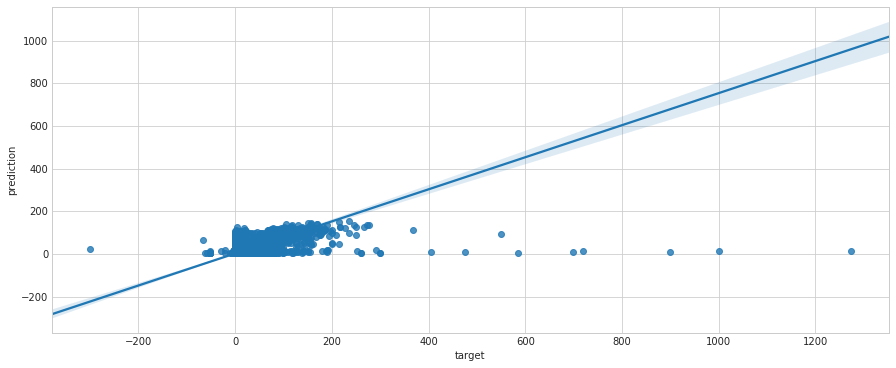

In [46]:
plt.figure(figsize=(15,6))
sns.regplot(x=df_val["target"], y=df_val["prediction"])
plt.show()

In [47]:
df_val['err'] = (df_val["target"] - df_val["prediction"])

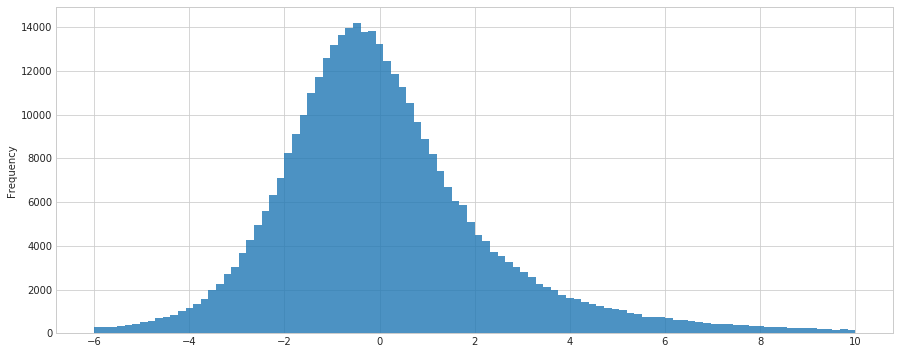

In [48]:
df_val['err'].plot(kind='hist', bins=100, range=(-6,10), alpha=0.8, figsize=(15,6))
plt.show()

In [49]:
df_val.describe()

,prediction,target,err
count,384877.000000,384877.000000,384877.000000
mean,12.780849,13.018913,0.238063
std,10.374127,12.092724,5.848486
min,3.034832,-300.000000,-321.609190
25%,7.118478,6.500000,-1.359776
50%,9.090071,9.500000,-0.202411
75%,13.895397,14.500000,1.190371
max,153.355835,1273.310000,1260.256567


## Make online predictions

In [50]:
import ast

In [51]:
csv_path = os.path.join('s3://', bucket, path_val, 'validate_small_2015.csv')
df = pd.read_csv(csv_path, header=None)

n = 20
features = df.iloc[0:n,1:].values
values  = df.iloc[0:n,0].values

In [52]:
endpoint_name = 'xgboost-2019-06-11-13-45-29-103'
content_type = 'text/csv'
data = "\n".join(["\n".join([",".join(str(x) for x in sample)]) for sample in features])

runtime = boto3.Session().client('sagemaker-runtime')
response = runtime.invoke_endpoint(EndpointName=endpoint_name,\
                                   ContentType='text/csv',\
                                   Body=data) 

In [53]:
result = list(ast.literal_eval(response['Body'].read().decode()))
print(result)

[11.0617761612, 5.83511066437, 7.82628536224, 7.13760519028, 11.1139945984, 6.56276655197, 5.31785440445, 8.68715953827, 7.43042421341, 10.0467329025, 11.0308160782, 8.81321048737, 29.7974967957, 8.02885818481, 7.37804508209, 8.48503494263, 21.5748615265, 5.92415857315, 16.6430835724, 11.5907611847]
